## Problem Statement

With the rise of Internet usage, it is very important to protect Networks.  The most common risk to a network’s security is an intrusion such as brute force, denial of service or even an infiltration from within a network. With the changing patterns in network behavior, it is necessary to switch to a dynamic approach to detect and prevent such intrusions.

This dataset has 49 features.
<br>
There are 3 different datatypes:
- Categorical: proto, state, service, attack_cat
- Binary: is_sm_ips_ports, is_ftp_login
- Numerical: Rest of the features

## ML Problem Formulation

*Binary classification of attack category*

The dataset has "label" with 0 and 1 where 0 represents non-attack and 1 represent attack. So with the features available we will try to predict a given datapoint whether it belongs to attack or non-attack category.

# Data cleaning and preprocessing

## Importing libraries

In [1]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats


import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

%matplotlib inline

## Reading data

In [2]:
# Creating a empty dict, where I will save all parameters required for test data transformation

saved_dict = {}

In [3]:
# Reading datasets
df = []
for i in range(1,5):
    path = './UNSW-NB15_{}.csv'  # There are 4 input csv files
    df.append(pd.read_csv(path.format(i), header = None))
data = pd.concat(df).reset_index(drop=True)  # Concat all to a single df

In [4]:
# This csv file contains names of all the features
col = pd.read_csv('./NUSW-NB15_features.csv', encoding='ISO-8859-1')

In [5]:
# Making column names lower case, removing spaces
col['Name'] = col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

In [6]:
# Renaming our dataframe with proper column names
data.columns = col['Name']

In [7]:
# Saving useful info, later this will be used to transform raw test data
saved_dict['columns'] = col['Name'][col['Name']!='label'].tolist()

In [8]:
data.shape

(2540047, 49)

In [9]:
data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [10]:
# Getting training and testing Data
train = pd.read_csv('a part of training and testing set/UNSW_NB15_training-set.csv')
test = pd.read_csv('a part of training and testing set/UNSW_NB15_testing-set.csv')

In [11]:
# Cheking the Shape
train.shape

(82332, 45)

In [12]:
# Having a Quick Look
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [13]:
# checking for null values
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

### Class distribution

In [14]:
train_0, train_1 = train['label'].value_counts()[0] / len(train.index), train['label'].value_counts()[1] / len(train.index)
test_0, test_1 = test['label'].value_counts()[0] / len(test.index), test['label'].value_counts()[1] / len(test.index)

print("In Train: there are {} % of class 0 and {} % of class 1".format(train_0, train_1))
print("In Test: there are {} % of class 0 and {} % of class 1".format(test_0, test_1))

In Train: there are 0.44939999028324346 % of class 0 and 0.5506000097167566 % of class 1
In Test: there are 0.3193776697977085 % of class 0 and 0.6806223302022916 % of class 1


In [15]:
train.dtypes.value_counts()

int64      30
float64    11
object      4
dtype: int64

In [16]:
# Categorical feature names
train.select_dtypes(exclude=np.number).columns

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [17]:
# removing all the "-" and replacing those with "None"
test['service'] = test['service'].apply(lambda x:"None" if x=="-" else x)

In [18]:
# Dividing the train data into attack and non-attack category
normal = train[train['label']==0]
anomaly = train[train['label']==1]

In [19]:
# Having a look at the columns
train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [20]:
# Check if any null value present in datasets
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

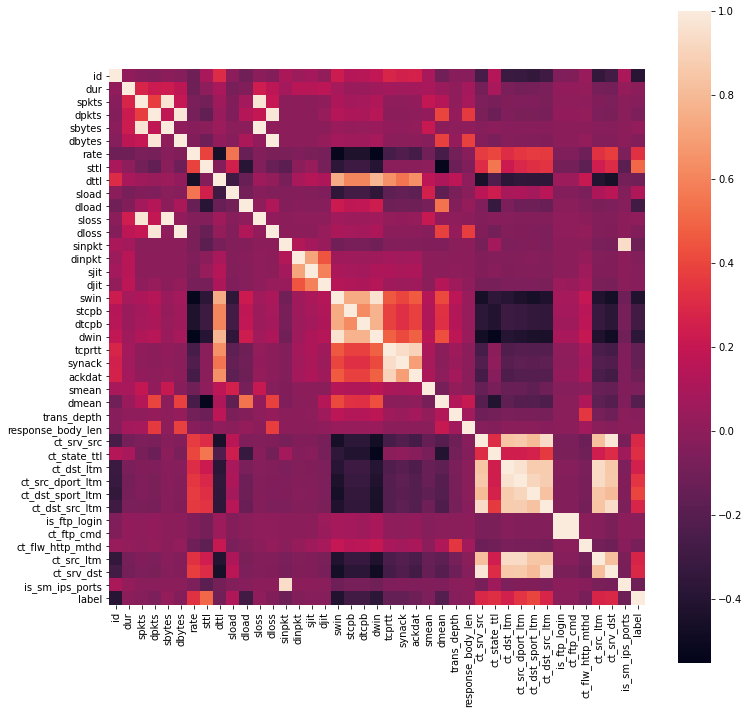

In [21]:
# Plotting the correlation matrix of the dataset
# Refer: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

method = "pearson"
# correlation matrix
corr_mat = train.corr(method=method)

plt.figure(figsize=(12,12)) 
sns.heatmap(corr_mat, square=True)
plt.show()

In [22]:
# Getting and printing high correlated features
limit = 0.9

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")


spkts                sbytes               0.9657497410285226
spkts                sloss                0.9736439932762719
dpkts                dbytes               0.9764185516954397
dpkts                dloss                0.9815064328007463
sbytes               sloss                0.9950271911315601
dbytes               dloss                0.9971088501010525
sinpkt               is_sm_ips_ports      0.9445057600993081
swin                 dwin                 0.960124697056046
tcprtt               synack               0.939473207106296
ct_srv_src           ct_dst_src_ltm       0.9337952137620703
ct_srv_src           ct_srv_dst           0.9778491535974956
ct_dst_ltm           ct_src_dport_ltm     0.9604008284947128
ct_dst_ltm           ct_src_ltm           0.9322524473418711
ct_src_dport_ltm     ct_dst_sport_ltm     0.9116374681083165
ct_src_dport_ltm     ct_src_ltm           0.9331720623310191
ct_dst_src_ltm       ct_srv_dst           0.9410468630505523
is_ftp_login         ct_ft

Most correlated features are:
* sbytes, sloss
* dpkts, dbytes, dloss
* swin, dwin
* ct_srv_src, ct_dst_src_ltm, ct_srv_dst
* ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm


## Pairplots of highly correlated features

### sbytes and sloss
1. These features are having very high corr between them more 95%
2. All the features are following a straight line except for the starting points that means they are having incresing relation with each other.

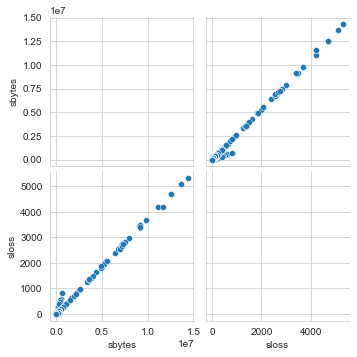

In [23]:
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['sbytes', 'sloss'])
plt.show()

### dpkts, dbytes and dloss
1. These features are also showing same charecteristics as above.
2. "dpkts" and "dbytes" are following a strainght line except for first few point and have 97% corr.
3. "dloss" and "dbytes" are completely following straight line with more than 99% corr.

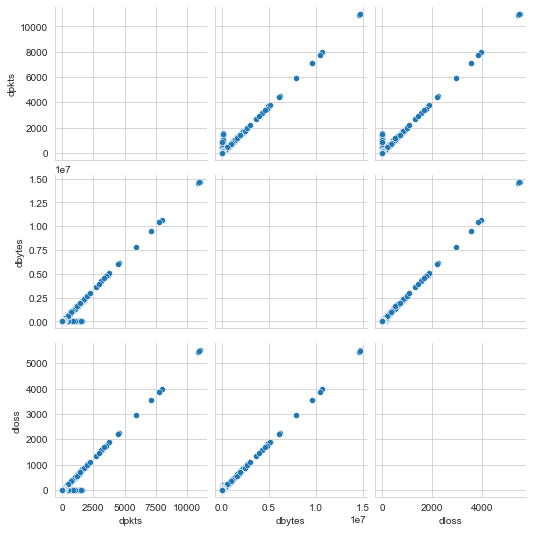

In [24]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['dpkts', 'dbytes', 'dloss'])
plt.show()


### swin, dwin
swin: Source TCP window advertisement, dwin: Destination TCP window advertisement

Correlation values is 99% between them. Even though these 2 columns are numerical but most of their values are only 0 and 255.

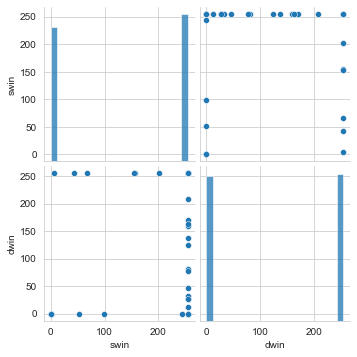

In [25]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['swin', 'dwin'])
plt.show()

### ct_srv_src, ct_srv_dst and ct_dst_src_ltm
1. Range of all the features are between 0 to 60.
2. Most of the values are close to 0 and less than 10.
3. Values are well scattered but there are clear line that means have some linear relationship.

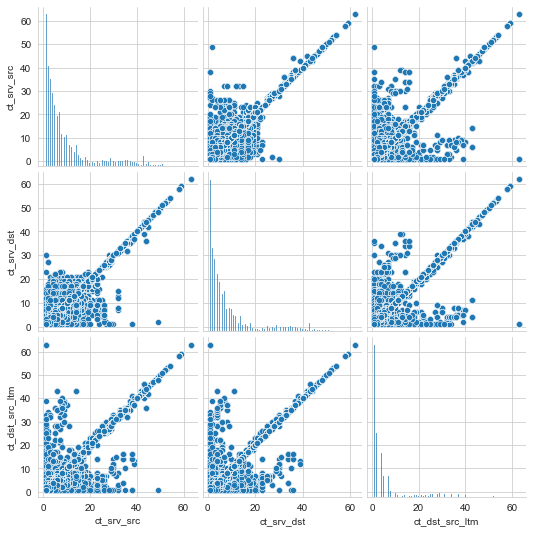

In [26]:
sns.pairplot(train, vars=['ct_srv_src', 'ct_srv_dst', 'ct_dst_src_ltm'])
plt.show()

### ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm and ct_dst_sport_ltm
1. values range from 0 to 60.
2. Most of the values are close to 0 and lesser than 20.
3. ct_dst_ltm highly corr with ct_dst_sport_ltm
4. ct_src_ltm corr with ct_src_dport_ltm
5. ct_src_dport_ltm corr with ct_dst_sp

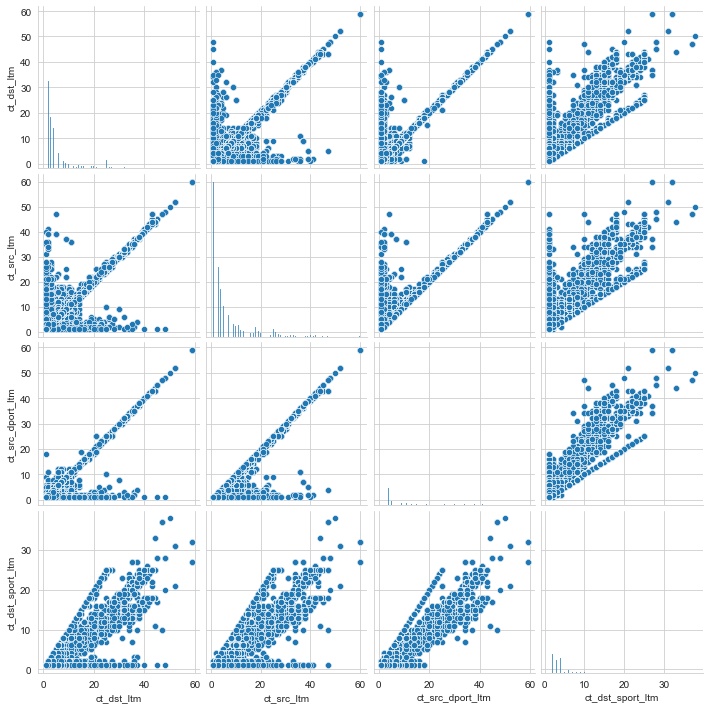

In [27]:
sns.pairplot(train, vars=['ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm'])
plt.show()

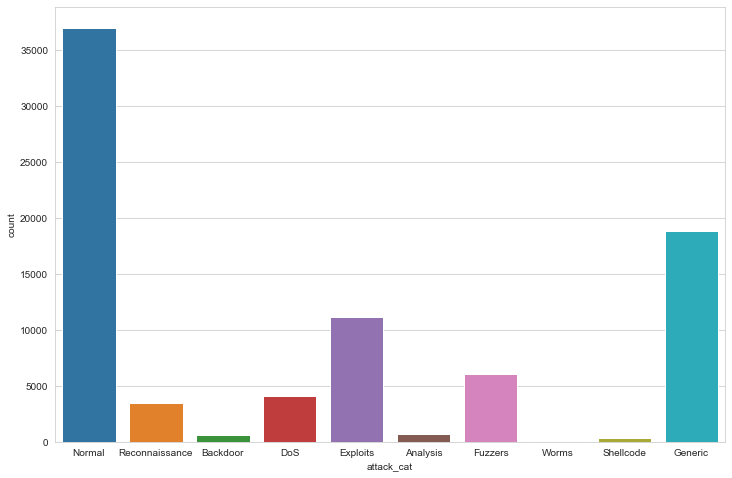

In [28]:
#from matplotlib import pyplot as plt
#import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.countplot(x="attack_cat", data=train)




## Removing highly correlated features

In [29]:
# Selecting all the features with high correlation values with other features
# Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [30]:
# We don't want to use these features for plotting because these are having high corr

print(to_drop)

['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'ct_src_dport_ltm', 'ct_ftp_cmd', 'ct_srv_dst']


In [31]:
saved_dict['corr_col'] = to_drop

In [32]:
# removing the features from train and test data
train.drop(columns=to_drop, inplace=True)
test.drop(columns=to_drop, inplace=True)

In [33]:
# Dropping columns which are not useful for the classification
# attack_cat is for multiclass classification
train.drop(['attack_cat','state','proto'], axis=1, inplace=True)
test.drop(['attack_cat','state','proto'], axis=1, inplace=True)

In [41]:
# getting categorical and numerical columns in 2 diff lists

cat_col = ['service']
num_col = list(set(x_train.columns) - set(cat_col))

NameError: name 'x_train' is not defined

In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])
x_train[num_col] = scaler.transform(x_train[num_col])

In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaler = scaler.fit(x_test[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

In [ ]:
# Creating Dummies for Categorical Data
x_train = pd.get_dummies(x_train, columns=cat_col)
x_test = pd.get_dummies(x_test, columns=cat_col)

In [ ]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(x_train, y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(x_train, y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_train, y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(x_train, y_train)

In [ ]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, x_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(x_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(x_train))
    classification = metrics.classification_report(y_train, v.predict(x_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

## Conclusion
1. Training this model using 4 models best Naive Baye Classifier, Decision Tree Classifier and KNeighborsClassifier and LogisticRegression.
2. The accuracy of Decision Tree Classifier and KNeighborsClassifier is higher than any other model.